<h1 align=center> AdaBoost Algorithm In Depth </h1>

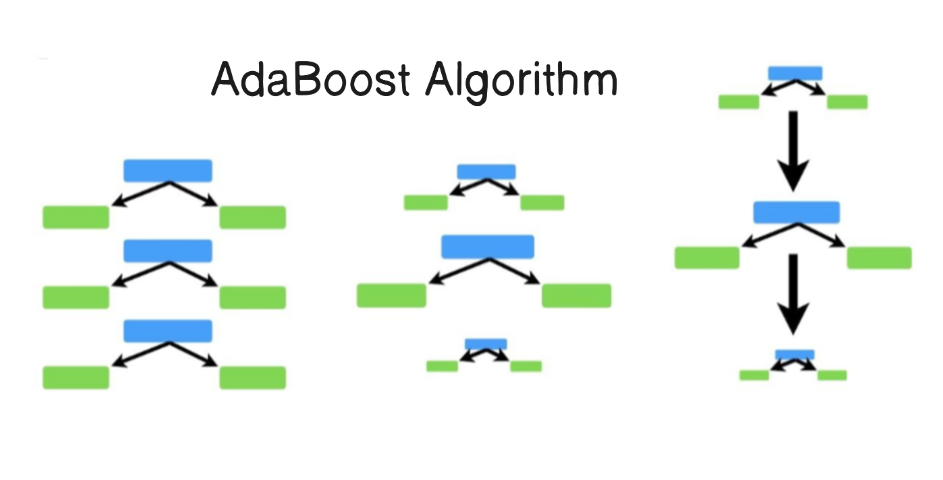

- AdaBoost, short for Adaptive Boosting
- Supervised learning algorithm
- Used for regression and classification problems
- Primarily used for classification
- It combines multiple weak classifiers to create a strong classifier
- Decision based ensemble learning algorithm
- Sequential ensemble learning
- Not require feature scaling

### Key Concepts

1. **Weak Learner**: A model that performs slightly better than random guessing. In AdaBoost, decision stumps (trees with a single split) are commonly used as weak learners.
2. **Boosting**: A sequential ensemble technique where each new model attempts to correct errors made by the previous models.
3. **Weights**: AdaBoost assigns weights to each training sample, which are adjusted at each iteration to focus on the most difficult samples.
    
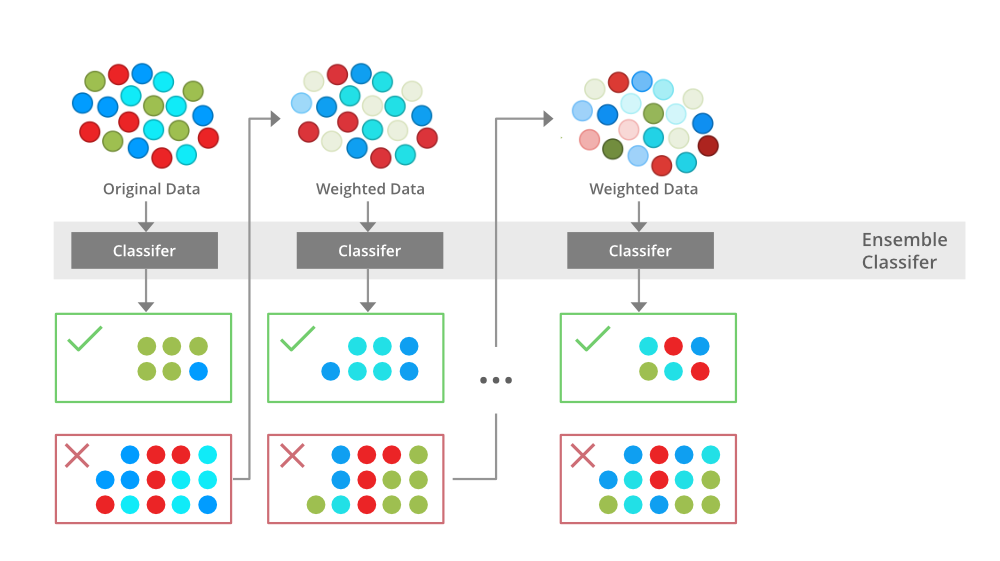
    

### **How It Works**

1. **Initialize Weights**:
    - Assign equal weights to all training samples
    - For N samples, each weight is w_i = 1/N
2. **Train Weak Learner**:
    - Train a weak learner using the weighted training samples
3. **Calculate Error**:
    - Total Error for a sample is the sum of the weights associated with the incorrectly classified samples
    - Compute the weighted error of the weak learner:
    
    $$
    \text{Error} = \sum_{i=1}^N w_i \cdot \mathbb{1}(y_i \neq h_t(x_i))
    $$
    
- where h_t(x_i) is the prediction of the weak learner for sample i
1. **Compute Alpha**:
    - Calculate the weight of the weak learner based on its accuracy:
    
    $$
    \alpha_t = \frac{1}{2} \log \left( \frac{1 - \text{Error}}{\text{Error}} \right)
    $$
    
- t-th weak learner
1. **Update Weights**:
    - Update the weights of the samples:
        
        $$
        w_i \leftarrow w_i \cdot e^{-\alpha_t y_i h_t(x_i)}
        $$
        
    
    $$
    \text{Correctly Classified Samples:}\\\text{- If a sample is correctly classified, }y_i = h_t(x_i)\\ \text{- The term } y_i h_t(x_i)\text { will be positive }(1\cdot1 or −1⋅−1)\\ \text{
    - This results in }e^{-\alpha_t},\text{ which is a number less than 1,}\\\text{ reducing the weight of the correctly classified sample}
    $$
    
    $$
    \text{Misclassified Samples:}\\ \text{- If a sample is misclassified , }y_i \neq h_t(x_i)\\ \text{- The term } y_i h_t(x_i)\text { will be negative }(1\cdot-1 or −1⋅1)\\ \text{
    - This results in }e^{\alpha_t},\text{ which is a number greater than 1,}\\ \text{ increasing the weight of the misclassified sample}
    $$
    
    - Normalize the weights to ensure they sum to 1
2. **Aggregate Weak Learners**:
    - The final strong classifier is a weighted combination of the weak learners:
    
    $$
    H(x) = \text{sign} \left( \sum_{t=1}^T \alpha_t h_t(x) \right)
    $$
    
- h_t(x) is the prediction of the t-th weak learner for input x
- α_t is the weight of the t-th weak learner
- T is the total number of weak learners

### Practical Example

- Below is the data

| Chest Pain | Blocked Arteries | Patient Weight | Heart Disease |
| --- | --- | --- | --- |
| Yes | Yes | 205 | Yes |
| No | Yes | 180 | Yes |
| Yes | No | 210 | Yes |
| Yes | Yes | 167 | Yes |
| No | Yes | 156 | No |
| No | Yes | 125 | No |
| Yes | No | 168 | No |
| Yes | Yes | 172 | No |

**Step1: Initialize Sample Weights**

- sample_weight = 1/total_num_of_samples

| Chest Pain | Blocked Arteries | Patient Weight | Heart Disease | Sample Weight |
| --- | --- | --- | --- | --- |
| Yes | Yes | 205 | Yes | 1/8 |
| No | Yes | 180 | Yes | 1/8 |
| Yes | No | 210 | Yes | 1/8 |
| Yes | Yes | 167 | Yes | 1/8 |
| No | Yes | 156 | No | 1/8 |
| No | Yes | 125 | No | 1/8 |
| Yes | No | 168 | No | 1/8 |
| Yes | Yes | 172 | No | 1/8 |

**Step2: Create Stumps**

- We will create decision stumps, first we will select ‘Chest Pain’, then ‘Block Arteries’, and finally, ‘Patient Weight’. And then calculate the Gini Index ******of each tree. The tree with the lowest Gini Index will be our first stump

`Note`In a forest of trees made with AdaBoost, the trees are usually just a node and two leaves, which is called stump.

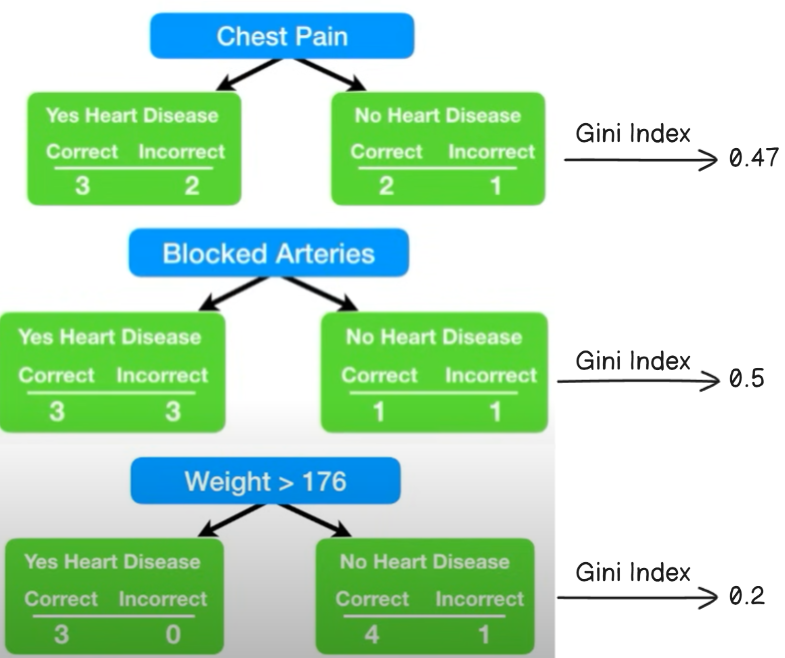

- We see the ‘Weight’ feature has the lowest Gini Index, so it will be our first stump

**Step3: Calculate Error**

- Total Error for a sample is the sum of the weights associated with the incorrectly classified samples
- For this example the total_error = 1/8

**Step 4: Calculate Alpha (Amount of Say)**

$$
\alpha_1 = \frac{1}{2} \log \left( \frac{1 - \text{Error}}{\text{Error}} \right)\\ \alpha_1 = \frac{1}{2} \log \left( \frac{1 - \frac{1}{8}}{\frac{1}{8}} \right) =  0.97
$$

`Note:`When a stump does  a good job, and the total_error is small, then the Amount Of Say is relatively large, positive value.

**Step 5: Update The Weights**

- The amount of, say (alpha) will be negative when the sample is correctly classified
- The amount of, say (alpha) will be positive when the sample is miss-classified

$$
\text{for miss-classified:}\\\text{new-sample-weight} = \text{sample-weight } \times e ^{\text{amount-of-say}}\\ = \frac{1}{8} e^{0.97} = 0.33 \\\text{for correct classified:}\\\text{new-sample-weight} = \text{sample-weight } \times e ^{-\text{ amount-of-say}}\\ = \frac{1}{8} e^{-0.97} = 0.05
$$

| Chest Pain | Blocked Arteries | Patient Weight | Heart Disease | Sample Weight | New Weight |
| --- | --- | --- | --- | --- | --- |
| Yes | Yes | 205 | Yes | 1/8 | 0.05 |
| No | Yes | 180 | Yes | 1/8 | 0.05 |
| Yes | No | 210 | Yes | 1/8 | 0.05 |
| Yes | Yes | 167 | Yes | 1/8 | 0.33 |
| No | Yes | 156 | No | 1/8 | 0.5 |
| No | Yes | 125 | No | 1/8 | 0.5 |
| Yes | No | 168 | No | 1/8 | 0.5 |
| Yes | Yes | 172 | No | 1/8 | 0.5 |
- We plugged 0.33 for the sample that was incorrectly classified
- For others, we plugged in 0.05
- If we add all new_sample_weights, we will get 0.68, so to get normalize value, we divide each new sample weight by 0.68, and our normalized weight are:

| Chest Pain | Blocked Arteries | Patient Weight | Heart Disease | Sample Weight | New Weight | Norm. Weight |
| --- | --- | --- | --- | --- | --- | --- |
| Yes | Yes | 205 | Yes | 1/8 | 0.05 | 0.07 |
| No | Yes | 180 | Yes | 1/8 | 0.05 | 0.07 |
| Yes | No | 210 | Yes | 1/8 | 0.05 | 0.07 |
| Yes | Yes | 167 | Yes | 1/8 | 0.33 | 0.49 |
| No | Yes | 156 | No | 1/8 | 0.5 | 0.07 |
| No | Yes | 125 | No | 1/8 | 0.5 | 0.07 |
| Yes | No | 168 | No | 1/8 | 0.5 | 0.07 |
| Yes | Yes | 172 | No | 1/8 | 0.5 | 0.07 |

- Now we can use the modified sample weights to make the second stump in the forest

| Chest Pain | Blocked Arteries | Patient Weight | Heart Disease | (Norm)Sample Weight |
| --- | --- | --- | --- | --- |
| Yes | Yes | 205 | Yes | 0.07 |
| No | Yes | 180 | Yes | 0.07 |
| Yes | No | 210 | Yes | 0.07 |
| Yes | Yes | 167 | Yes | 0.49 |
| No | Yes | 156 | No | 0.07 |
| No | Yes | 125 | No | 0.07 |
| Yes | No | 168 | No | 0.07 |
| Yes | Yes | 172 | No | 0.07 |

**Step 6: Create New Dataset**

- Our next step is to create new dataset
- We will divide the normalized weight into buckets

| Chest Pain | Blocked Arteries | Patient Weight | Heart Disease | (Norm)Sample Weight | Range Of Buckets |
| --- | --- | --- | --- | --- | --- |
| Yes | Yes | 205 | Yes | 0.07 | 0 - 0.07 |
| No | Yes | 180 | Yes | 0.07 | 0.07 - 0.14 |
| Yes | No | 210 | Yes | 0.07 | 0.14 - 0.21 |
| Yes | Yes | 167 | Yes | 0.49 | 0.21 - 0.70 |
| No | Yes | 156 | No | 0.07 | 0.70 - 0.77 |
| No | Yes | 125 | No | 0.07 | 0.77 - 0.84 |
| Yes | No | 168 | No | 0.07 | 0.84 - 0.91 |
| Yes | Yes | 172 | No | 0.07 | 0.91 - 1 |
- Imagine we picked these numbers randomly (0.72, 0.42, 0.83, 0.51) and we put them below to our new collection of samples
- We see below that we select the same with pink color (row 2, row 4) two times, it is how AdaBoost focus on miss-classified

| Chest Pain | Blocked Arteries | Patient Weight | Heart Disease |
| --- | --- | --- | --- |
| No | Yes | 156 | No |
| Yes | Yes | 167 | No |
| No | Yes | 125 | No |
| Yes | Yes | 167 | No |
- We will continue to pick random numbers and add samples to the new collection until the new collection is the same size as the original

| Chest Pain | Blocked Arteries | Patient Weight | Heart Disease |
| --- | --- | --- | --- |
| No | Yes | 156 | No |
| Yes | Yes | 167 | No |
| No | Yes | 125 | No |
| Yes | Yes | 167 | No |
| Yes | Yes  | 167 | No |
| Yes  | Yes | 172 | No |
| Yes | Yes | 205 | Yes |
| Yes | Yes | 167 | Yes |
- In the end, we see that the miss classified sample was added four times to our new collection of samples (row2, row4, row5, row8), reflecting it is a larger sample weight
- Now, we will perform the same steps just we did before (Step1-Step6) for the below data

| Chest Pain | Blocked Arteries | Patient Weight | Heart Disease |
| --- | --- | --- | --- |
| No | Yes | 156 | No |
| Yes | Yes | 167 | No |
| No | Yes | 125 | No |
| Yes | Yes | 167 | No |
| Yes | Yes  | 167 | No |
| Yes  | Yes | 172 | No |
| Yes | Yes | 205 | Yes |
| Yes | Yes | 167 | Yes |
- We will iterate through these steps until and unless a low training error is achieved

**Step 7: New Prediction**

- Imagine we created three weak learners (h(1), h(2), h(3))
- Below we did prediction using all three learners:
1. Weak Learner 1 (h1):
    - Weight α1=0.97
    - Prediction h1(x)=+1
2. Weak Learner 2 (h2):
    - Weight α2=0.50
    - Prediction h2(x)=−1
3. Weak Learner 3 (h3):
    - Weight α3=0.30
    - Prediction h3(x)=+1
- Weight_sum = (0.97⋅1)+(0.50⋅−1)+(0.30⋅1)=0.97−0.50+0.30=0.77
- The sign of the weighted sum is positive (0.77), so the final prediction H(x) is +1

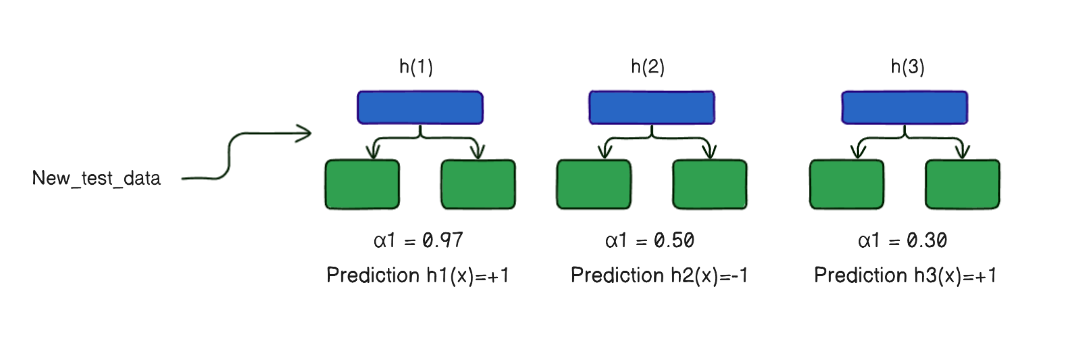

### Advantages

1. **Improved Accuracy**: By focusing on the difficult samples, AdaBoost often achieves higher accuracy than individual weak learners.
2. **No Prior Knowledge Required**: AdaBoost does not require prior knowledge about the weak learner's performance.
3. **Versatility**: It can be used with various types of weak learners and for both binary and multi-class classification problems.

### Disadvantages

1. **Sensitive to Noisy Data**: AdaBoost can be sensitive to noisy data and outliers since it will focus heavily on misclassified samples.
2. **Computational Complexity**: The need to repeatedly train the weak learner on weighted samples can be computationally expensive.

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the weak learner
weak_learner = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost with the weak learner
ada_boost = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, random_state=42)

# Train AdaBoost
ada_boost.fit(X_train, y_train)

# Make predictions
y_pred = ada_boost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


c:\Users\44787\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
